In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np




In [3]:

# File to Load 
city_data_to_load = "./city_data.csv"
ride_data_to_load = "./ride_data.csv"


In [4]:
# Read the City and Ride Data
# See some sample records to see how data looks

city_data = pd.read_csv(city_data_to_load)
city_data.head()




,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Read the Ride Data
# See some sample records to see how data looks


ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()



,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:

# Combine the data into a single dataset

# Display the data table for preview


combined_df = pd.merge(ride_data, city_data, how='outer', on='city')
combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Bubble Plot of Ride Sharing Data

# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

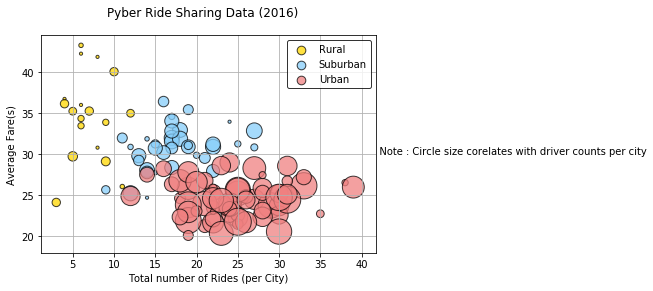

city
Richardfort                Urban
Williamsstad               Urban
Port Angela                Urban
Rodneyfort                 Urban
West Robert                Urban
West Anthony               Urban
West Angela                Urban
Martinezhaven              Urban
Karenberg                  Urban
Barajasview                Urban
Robertport                 Urban
Joneschester               Urban
Leahton                    Urban
West Christopherberg       Urban
Johnton                    Urban
Reynoldsfurt               Urban
Port David                 Urban
New Kimberlyborough        Urban
Carriemouth                Urban
Rogerston                  Urban
Jerryton                   Urban
Loganberg                  Urban
Simpsonburgh               Urban
Port Frank                 Urban
South Latoya               Urban
West Samuelburgh           Urban
Grahamburgh                Urban
West Patrickchester        Urban
North Madeline             Urban
South Jack                 Urban
     

In [19]:
#group be city 
by_city = combined_df.groupby('city')

# avg fare by city
avg_fare = by_city['fare'].mean()

# rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city['driver_count'].mean()

# city type data
city_type = city_data.set_index('city')['type']

# dataframe from above series can be combined as they have same index
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

#separated dfs for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']


plt.suptitle('Pyber Ride Sharing Data (2016)')

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = 'gold', edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = 'lightskyblue', edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = 'lightcoral', edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
#plt.title('Note : Circle size corelates with driver counts per city')
plt.xlabel('Total number of Rides (per City)')
plt.ylabel('Average Fare(s)')

plt.annotate(s='   Note : Circle size corelates with driver counts per city',xy=(41,30))

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.grid()
plt.savefig("./pyber_ride_sharing_data.png")
plt.show()
city_type


# Total Fares by City Type


In [192]:
# Calculate Type Percents
#Get only citytype and fare

city_fare_df=combined_df[["type","fare"]]
city_fare_df.head()


#Group by type

city_fare_group_df=city_fare_df.groupby(["type"]).sum()
city_fare_group_df.reset_index(inplace=True)

city_fare_group_df


,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [193]:
# Build Pie Chart


# Labels for the sections of our pie chart
labels = city_fare_group_df["type"].unique()
labels


# # The values of each section of the pie chart
fare = city_fare_group_df["fare"].unique()
fare

# # The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# # Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)





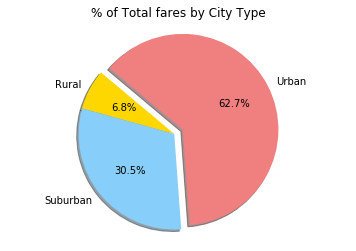

In [194]:
 # Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total fares by City Type")
plt.axis("equal")
plt.savefig("./total_fares_by_citytype.png")
plt.show()


#  Total Rides by City Type
 # Calculate Ride Percents

# Build Pie Chart

# Save Figure

In [195]:
#Get only citytype and rideid

city_ride_df=combined_df[["type","ride_id"]]
city_ride_df.head()


#Group by type

city_ride_group_df=city_ride_df.groupby(["type"]).count()
city_ride_group_df.reset_index(inplace=True)

city_ride_group_df


,type,ride_id
0,Rural,125
1,Suburban,625
2,Urban,1625


In [196]:
# Build Pie Chart


# Labels for the sections of our pie chart
labels = city_ride_group_df["type"].unique()
labels


# # The values of each section of the pie chart
ride = city_ride_group_df["ride_id"].unique()
ride

# # The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# # Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)




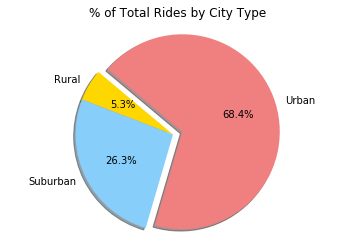

In [197]:
 # Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.savefig("./total_rides_by_citytype.png")
 # Calculate Driver Percents

# Build Pie Charts

# Save Figure
plt.show()

# Total Drivers by City Type
 # Calculate Driver Percents

# Build Pie Charts

# Save Figure

In [198]:
#Get only citytype and city type

city_driver_1=combined_df[["type","city","driver_count"]]
city_driver_1

city_driver_2=city_driver_1.drop_duplicates(subset=None, keep='first', inplace=False)
city_driver_df=city_driver_2[["type","driver_count"]]



#Group by type

city_driver_group_df=city_driver_df.groupby(["type"]).sum()
city_driver_group_df.reset_index(inplace=True)

city_driver_group_df

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


In [199]:
# Build Pie Chart


# Labels for the sections of our pie chart
labels = city_driver_group_df["type"].unique()
labels


# # The values of each section of the pie chart
driver = city_driver_group_df["driver_count"].unique()
driver

# # The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# # Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)


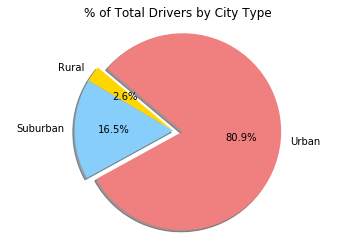

In [200]:
 # Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(driver, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.savefig("./total_driver_by_citytype.png")


# Save Figure
plt.show()